In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

dataset1 = pd.read_csv('dataset1.csv')
dataset1.label.replace(-1,0,inplace=True)
dataset2 = pd.read_csv('dataset2.csv')
dataset2.label.replace(-1,0,inplace=True)
dataset3 = pd.read_csv('dataset3.csv')

In [2]:
dataset1.drop_duplicates(inplace=True)
dataset2.drop_duplicates(inplace=True)
dataset3.drop_duplicates(inplace=True)

dataset12 = pd.concat([dataset1,dataset2],axis=0)

In [3]:
dataset12.head()

,user_id,discount_rate,distance,day_of_month,days_distance,discount_man,discount_jian,is_man_jian,total_sales,sales_use_coupon,...,day_gap_after,is_weekend,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weekday7,label
0,1832624,0.90,0.0,29,16,200.0,20.0,1,972.0,124.0,...,-1,0,0,0,0,0,1,0,0,0
1,1832624,0.90,0.0,29,16,200.0,20.0,1,13990.0,2044.0,...,-1,0,0,0,0,0,1,0,0,0
2,163606,0.85,10.0,21,8,200.0,30.0,1,50.0,9.0,...,-1,0,0,0,0,1,0,0,0,0
3,163606,0.85,10.0,21,8,200.0,30.0,1,737.0,96.0,...,-1,0,0,0,0,1,0,0,0,0
4,4061024,0.90,10.0,26,13,200.0,20.0,1,972.0,124.0,...,-1,0,0,1,0,0,0,0,0,0


In [4]:
dataset1_y = dataset1.label
dataset1_x = dataset1.drop(['user_id','label','day_gap_before','day_gap_after'],axis=1)  # 'day_gap_before','day_gap_after' cause overfitting, 0.77
dataset2_y = dataset2.label
dataset2_x = dataset2.drop(['user_id','label','day_gap_before','day_gap_after'],axis=1)
dataset12_y = dataset12.label
dataset12_x = dataset12.drop(['user_id','label','day_gap_before','day_gap_after'],axis=1)
dataset3_preds = dataset3[['user_id','coupon_id','date_received']]
dataset3_x = dataset3.drop(['user_id','coupon_id','date_received','day_gap_before','day_gap_after'],axis=1)

In [5]:
dataset1_x = dataset1_x.fillna(-1.0)
dataset1_y = dataset1_y.fillna(-1.0)
dataset2_x = dataset2_x.fillna(-1.0)

In [6]:
rf = RandomForestRegressor(n_estimators=200, max_depth=12,n_jobs=1)
rf.fit(dataset1_x,dataset1_y)
valid_pred = rf.predict(dataset2_x)
#dataset1_y.head()


In [24]:
dataset2.head()

,user_id,discount_rate,distance,day_of_month,days_distance,discount_man,discount_jian,is_man_jian,total_sales,sales_use_coupon,...,day_gap_after,is_weekend,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weekday7,label
0,1439408,0.866667,1.0,28,14,150.0,20.0,1,63.0,5.0,...,-1,1,0,0,0,0,0,1,0,0
1,1439408,0.866667,1.0,28,14,150.0,20.0,1,594.0,21.0,...,-1,1,0,0,0,0,0,1,0,0
2,1439408,0.950000,0.0,13,30,20.0,1.0,1,1.0,0.0,...,-1,0,1,0,0,0,0,0,0,0
3,1439408,0.950000,0.0,13,30,20.0,1.0,1,13.0,3.0,...,-1,0,1,0,0,0,0,0,0,0
4,1439408,0.950000,0.0,16,2,20.0,1.0,1,1.0,0.0,...,28,0,1,0,0,0,0,0,0,0


In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(dataset2_y, valid_pred)

0.7879718397293703

<Figure size 432x288 with 0 Axes>

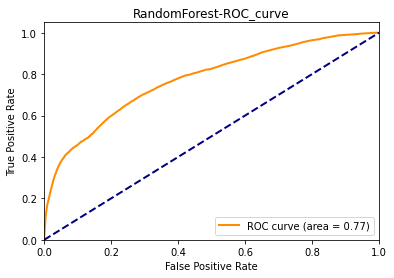

In [9]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(dataset2_y, valid_pred);
roc_auc = auc(fpr, tpr) 
plt.figure()
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest-ROC_curve')
plt.legend(loc="lower right")
plt.show()